<a href="https://colab.research.google.com/github/cmcoto/swiss-watches-fastai/blob/master/FastAI_CNNResnet34ofSwissWatches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

IF USING COLAB NOTEBOOK... YOU NEED TO DO THIS!


In [1]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   3136      0 --:--:-- --:--:-- --:--:--  3136
    100% |████████████████████████████████| 5.7MB 5.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 585.6MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x6217a000 @  0x7fcd440c02a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
Cloning into 'course-v3'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9

And Use your GOOGLE DRIVE

In [2]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
with open('/content/gdrive/My Drive/data/watches/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

FileNotFoundError: ignored

### Create directory and upload urls file into your server

In [0]:
from fastai import *
from fastai.vision import *

In [7]:
print(path)

/content/gdrive/My Drive/data/watches


Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [0]:
folder = 'audemars'
file = 'urls_audemars.txt'

In [0]:
folder = 'delma'
file = 'urls_delma.txt'

In [0]:
folder = 'omega'
file = 'urls_omega.txt'

In [0]:
folder = 'oris'
file = 'urls_oris.txt'

In [0]:
folder = 'patek'
file = 'urls_patek.txt'

In [0]:
folder = 'rolex'
file = 'urls_rolex.txt'

In [0]:
folder = 'tissot'
file = 'urls_tissot.txt'

You will need to run this line once per each category.

In [0]:
path = Path('/content/gdrive/My Drive/data/watches/')
# dest = path/folder #Uncomment to make the path/folder on the Disc.
# dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.classes

AttributeError: ignored

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/fastai/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['audemars','delma','omega','oris','patek','rolex','tissot']

In [54]:
download_images(path/file, dest, max_pics=200)

Error https://www.jomashop.com/media/catalog/product/cache/1/small_image/360x/9df78eab33525d08d6e5fb8d27136e95/t/i/tissot-heritage-visodate-automatic-men_s-watch-t019.430.16.031.01_7.jpg 'content-length'
Error https://www.berrysjewellers.co.uk/images/tissot-v8-43mm-blue-dial-steel-bezel-mens-bracelet-watch-p7885-17036_image.jpg 'content-length'
Error https://www.grahamsjewellers.com.au/media/catalog/product/cache/12/thumbnail/1000x/9df78eab33525d08d6e5fb8d27136e95/t/i/tissot-v8-chronograph-gents-watch-30257738-a_16-10-18-12-22-52-grahams-jewellers.jpg 'content-length'
Error https://www.berrysjewellers.co.uk/images/tissot-pr100-41mm-black-dial-steel-mesh-bracelet-mens-chronograph-watch-p10000-19114_image.jpg 'content-length'
Error https://webshop.cashconverters.com.au/thumbnail/425x260/2871340-mens-tissot-watch-t011417am07-0.jpg 'content-length'
Error http://dhb3yazwboecu.cloudfront.net/278/T116.617.11.037.00_m.jpg 'content-length'
Error https://valiram.com/wp-content/uploads/2014/01/ti

Process Process-53:
Process Process-55:
Process Process-54:
Process Process-51:
Process Process-50:
Process Process-52:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py"

KeyboardInterrupt: ignored

  File "/usr/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [56]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

audemars


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
delma


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
omega


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
oris


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
patek


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
rolex


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


tissot


module 'PIL.Image' has no attribute 'register_decoder'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  if "transparency" in self.info and \


module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'
module 'PIL.Image' has no attribute 'register_decoder'


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [24]:
data.classes

['audemars', 'delma', 'omega', 'oris', 'patek', 'rolex', 'tissot']

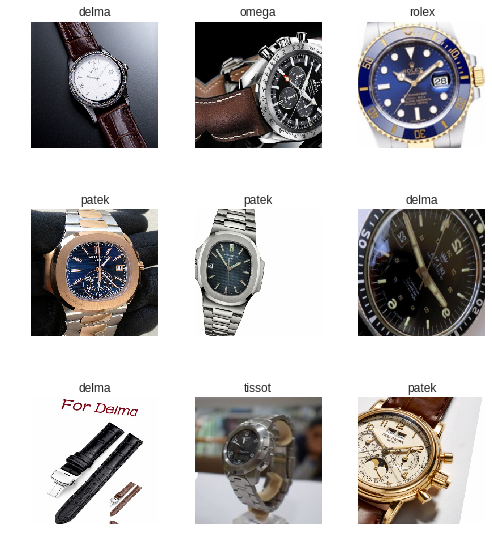

In [23]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['audemars', 'delma', 'omega', 'oris', 'patek', 'rolex', 'tissot'],
 7,
 955,
 265)

## Train model

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 37580354.47it/s]


In [62]:
learn.fit_one_cycle(4)

Total time: 03:24
epoch  train_loss  valid_loss  error_rate
1      2.208352    1.485220    0.550943    (00:53)
2      1.741634    1.223953    0.441509    (00:50)
3      1.432314    1.173129    0.449057    (00:50)
4      1.239857    1.142376    0.441509    (00:50)



In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [65]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


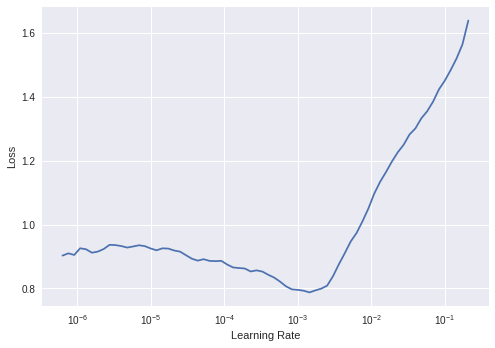

In [66]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(7, max_lr=slice(10e-5,3e-4))

Total time: 06:29
epoch  train_loss  valid_loss  error_rate
1      0.911400    1.052044    0.377358    (00:54)
2      0.772182    0.927876    0.294340    (00:53)
3      0.625109    0.938035    0.313208    (00:55)
4      0.488040    0.848517    0.309434    (00:56)
5      0.387589    0.830916    0.275472    (00:58)
6      0.307936    0.793472    0.275472    (00:56)
7      0.251502    0.784591    0.271698    (00:55)



In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

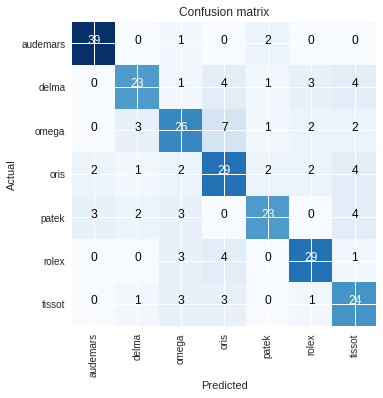

In [29]:
interp.plot_confusion_matrix()

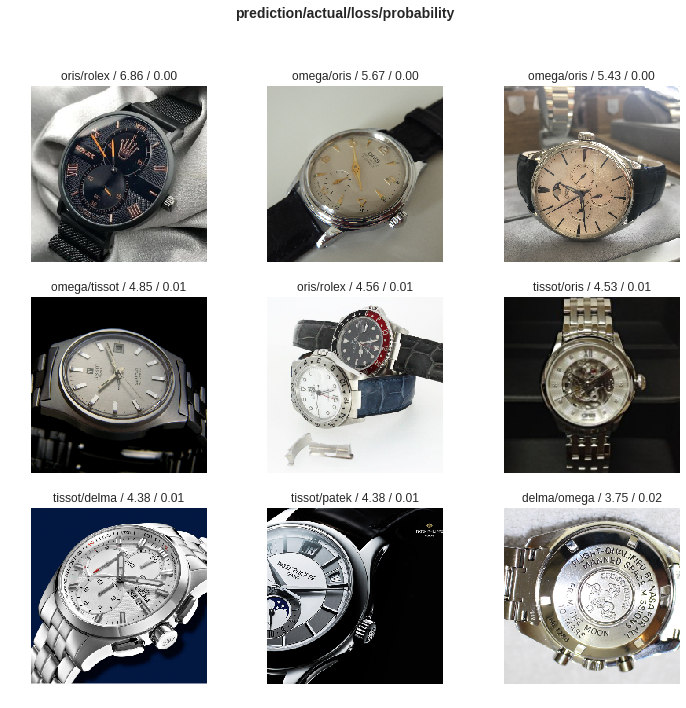

In [30]:
interp.plot_top_losses(9, figsize=(12,11))

In [31]:
interp.most_confused(min_val=2)

[('omega', 'oris', 7),
 ('delma', 'oris', 4),
 ('delma', 'tissot', 4),
 ('oris', 'tissot', 4),
 ('patek', 'tissot', 4),
 ('rolex', 'oris', 4),
 ('delma', 'rolex', 3),
 ('omega', 'delma', 3),
 ('patek', 'audemars', 3),
 ('patek', 'omega', 3),
 ('rolex', 'omega', 3),
 ('tissot', 'omega', 3),
 ('tissot', 'oris', 3)]

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [0]:
fd = FileDeleter(file_paths=top_loss_paths)

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [32]:
data.classes

['audemars', 'delma', 'omega', 'oris', 'patek', 'rolex', 'tissot']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
# fastai.defaults.device = torch.device('cpu')

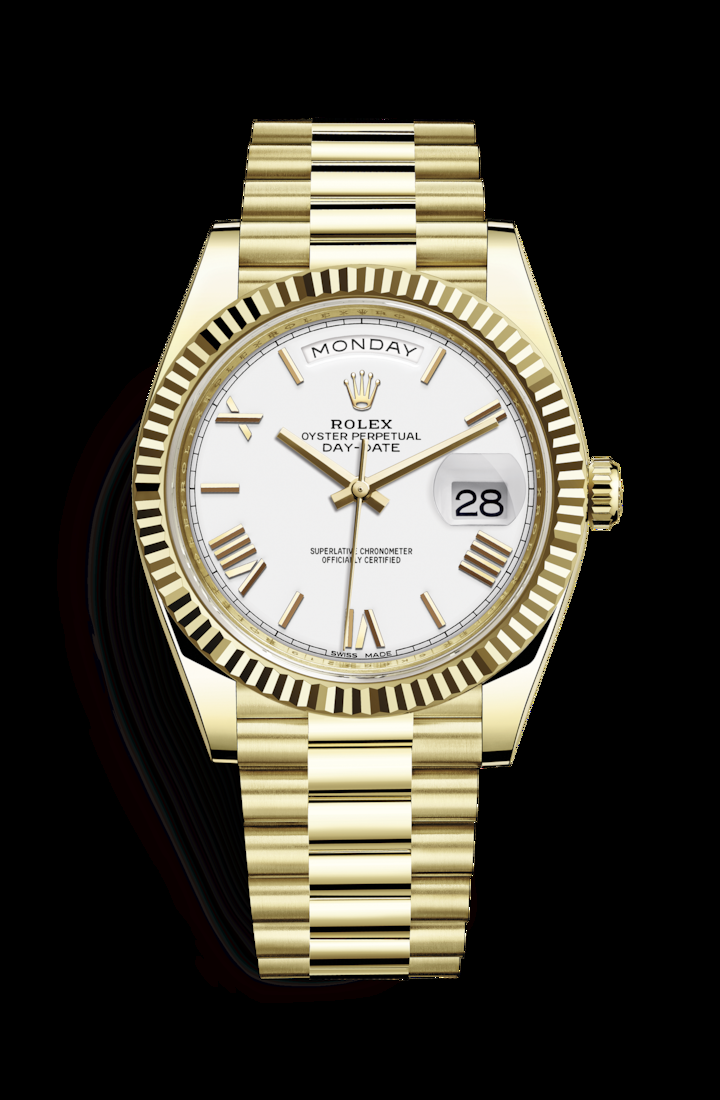

In [41]:
img = open_image(path/'/content/gdrive/My Drive/data/watches/rolex/00000001.jpg')
img

In [0]:
classes = ['audemars','delma','omega','oris','patek','rolex','tissot']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [44]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'rolex'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))